<a href="https://colab.research.google.com/github/NatasaKinzy/Data-Science/blob/main/Unit3/NataKinzU3Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install "preliz[full,notebook]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.8/515.8 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.9 MB/s eta 0:00:00


In [ ]:
import preliz as pz

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import arviz as az
import pymc as pm

# Unit 3 Project: What % of Students Remain In-State for Undergrad?

What is the average percentage of students from each US state enrolled in schools in that state? (What % of students in the US attend college in their home state?)

# Context

The US has thousands of colleges and thousands of options for students throughout the country. No one is forced to go to in-state school, but the tution for a state college when you are from that state is substantially cheaper, so if it's a good school, many may choose to stay in-state. Additionally, some people have factors related to their families that would mean they should stay in-state in order to provide support or be near just in case. 2/3 of my siblings decided to go out of state for college, and as I am looking at colleges now, I was curious what average % of students from a given state will stay in that state for college. You could think of it as a US state's average "retention rate" :)

# Priors

I don't really have much previous knowledge of this issue except for life experience. To me, it seems like around 60% of the people I interact with plan to or did leave the state for college, but the people in my life aren't the general public. So I am going to have 2 priors, one assuming the college age students in the US are more similar to the people I've interacted with in the past, and another assuming cheaper tution and staying closer to home is more important to many.

Therefore, my first prior, assuming the vast population is more similar to my family, will be that on average 0.45 stay in state. Therefore, my predicted mean will be 0.45, variance would be medium so maybe around 20 as states like Idaho likely retain fewer students than Texas. Additionally, my data would have a slight positive skew as the average would be around 0.45. Lastly, I think the kurtosis of around 2 as I think this distribution would have very few extremes and have a fairly flat peak ranging from 0.35-0.55. I strongly believe this will be the more inaccurate prior.

My second prior, assuming cheaper tutition and familiarity is a top priority for many, will be that on average 0.76 stay in state. Therefore, my predicted mean will be 0.76, variance would be medium so again closer to 18 as states like Idaho still likely retain fewer students than Texas. Additionally, my data would have a negative skew as the average would be around 0.76 and with limited varriance values closer to 0-0.50 would be fairly low. Lastly, I think the kurtosis of around 4 as I think this distribution would have a much taller peak around 76 as that seems to me a likely, not extremely varried mean. I believe this will be more accurate because tuition and student loans have a large effect on many people's lives, and for some, it's very important to stay close to home.

<Axes: >

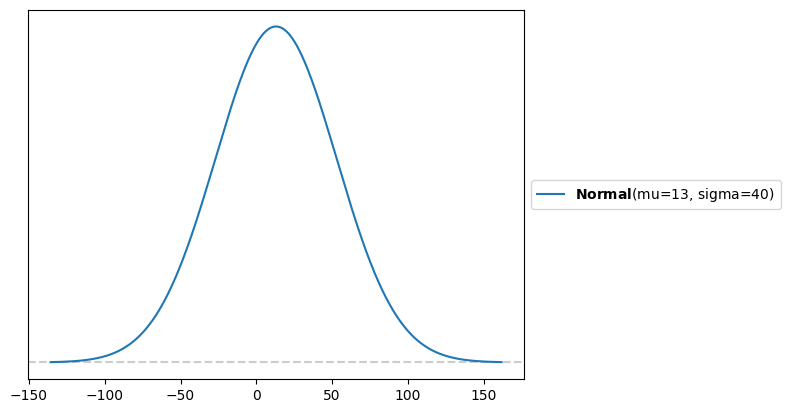

In [ ]:
pz.Normal(13, 40).plot_pdf()


<Axes: >

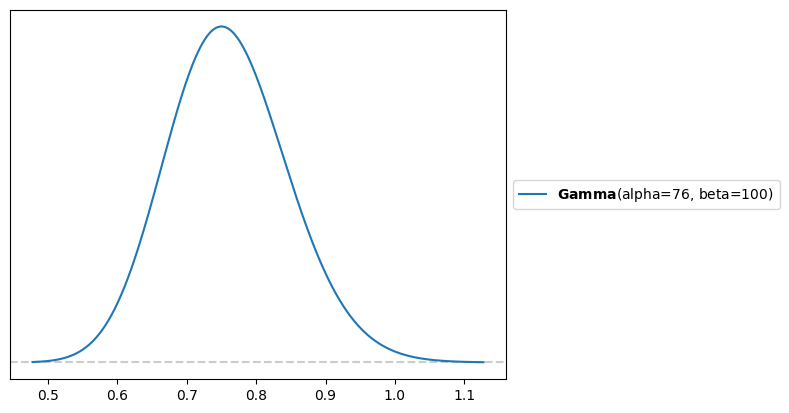

In [ ]:
pz.Gamma(76, 100).plot_pdf()

# Likelihood

Now I'm going to actually plug in some data and see if I can find the average "retention rate" of US states.


In [ ]:
#first I'll upload my data I got from a site called Education Data Initiative
url_InState = 'https://raw.githubusercontent.com/NatasaKinzy/Data-Science/refs/heads/main/Unit3/In-State%20College%20Enrollment%20Data%20-%20Sheet1%20(1).csv'
data_InState = pd.read_csv(url_InState)
data_InState

,% Enrolled From State Staying In-State
0,85.4
1,48.7
2,85.3
3,82.7
4,87.5
5,68.2
6,56.5
7,72.9
8,84.8
9,76.2


(array([ 2.,  1.,  2.,  2.,  3.,  3.,  9.,  8., 10., 10.]),
 array([45.4 , 49.72, 54.04, 58.36, 62.68, 67.  , 71.32, 75.64, 79.96,
        84.28, 88.6 ]),
 <BarContainer object of 10 artists>)

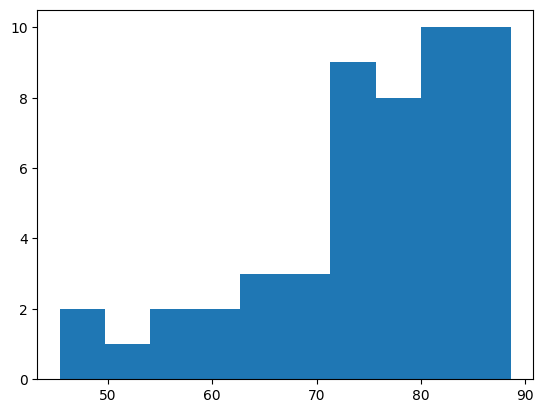

In [ ]:
#now I'll make my histogram
plt.hist(data_InState["% Enrolled From State Staying In-State"])

This histogram can be used to help visualize my data.

Now I'll try to match my distributions to my histogram and these will serve as a visual aid when crafting my model.

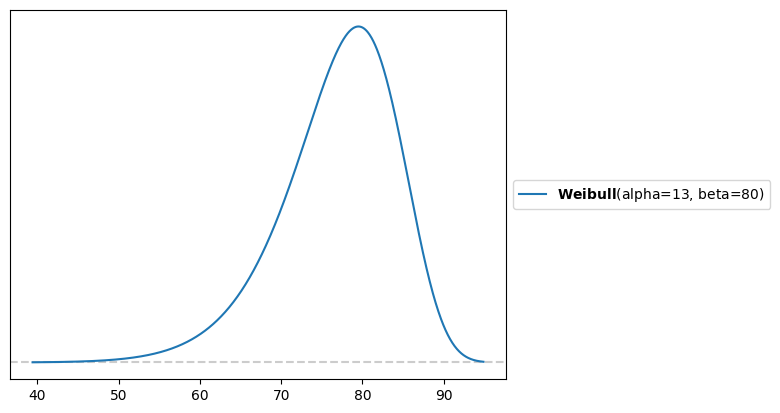

In [ ]:
with pm.Model() as W_InState:
  pz.Weibull(13, 80).plot_pdf()

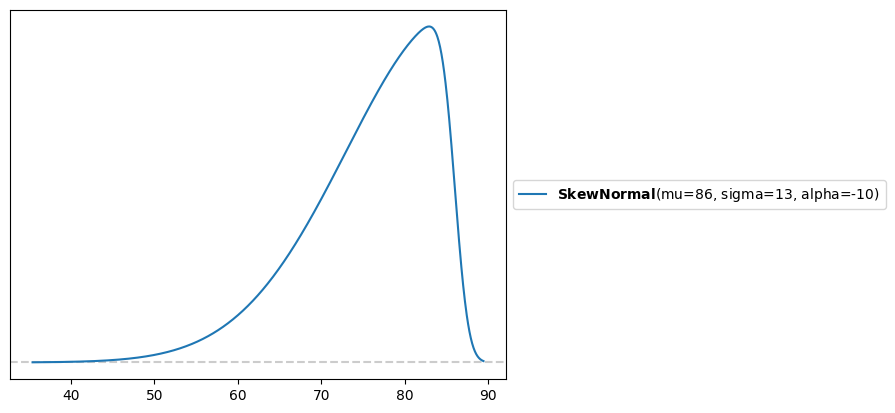

In [ ]:
with pm.Model() as SN_InState:
  pz.SkewNormal(86, 13, -10).plot_pdf()

In [ ]:
with pm.Model() as model_InState:

    alphaA = pm.Normal('alphaA', mu = 50)

    betaB = pm.Normal('betaB', sigma = 90)

    Likelihood_Good = pm.Weibull('Likelihood_Good', alpha = alphaA, beta = betaB, observed=data_InState)
    idata_InState = pm.sample()

  #how do I fix this?? what the helly is going on??

Output()

array([<Axes: title={'center': 'alphaA'}>,
       <Axes: title={'center': 'betaB'}>], dtype=object)

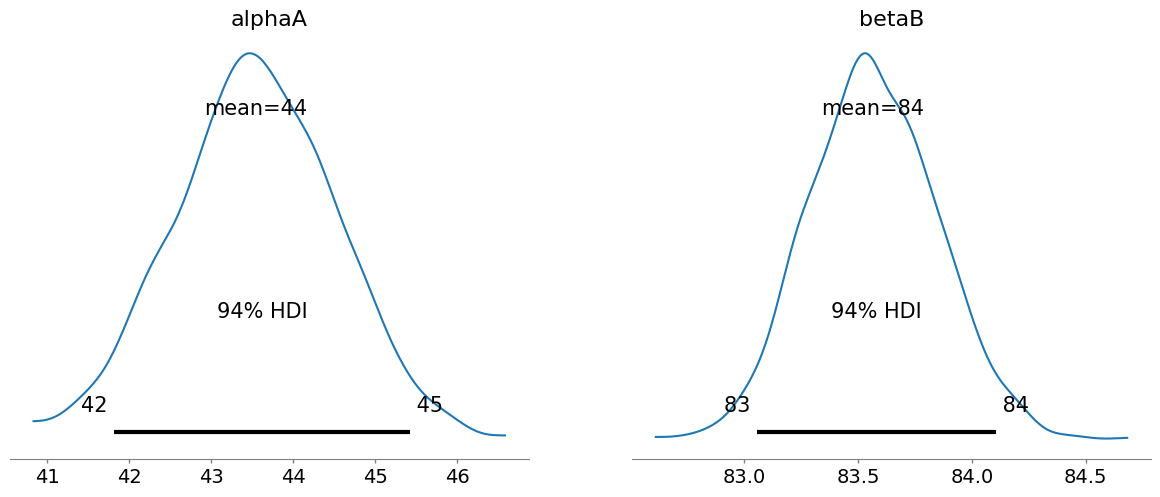

In [ ]:
az.plot_posterior(idata_InState)

In [ ]:
az.plot_ppc(data_InState, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

TypeError: `data` argument must have the group "posterior_predictive" for ppcplot

In [ ]:
with pm.Model() as model_InState:

    alpha = pm.Normal('alphaA', mu = 13, sigma = 80)

    muM = pm.Normal('betaB', mu = 15, sigma = 85)

    sigma = pm.Normal ('sigma', mu = 10, sigma = 75)

    Likelihood_Good = pm.SkewNormal('Likelihood_Good', alpha = muM, beta = sigma, observed=data_InState)
    idata_InStateB = pm.sample()

TypeError: RandomVariable.make_node() got an unexpected keyword argument 'beta'

In [ ]:
az.plot_posterior(idata_InStateB)

In [ ]:
az.plot_ppc(data_InStateB, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])
#what is everything after data_InStateB for???

# Analysis

My initial guesses at my two different priors and their moments were interesting. The prior with a mean of 0.45 proved to be VERY innacurate while the prior with a mean of 0.76 was almost exact for a guess. I think the distributions I found (Weibull and SkewNormal) were almost perfect for my data set except for the fact that the distributions in the pz gallery don't easily account for two bumps and my data has a left skew with a bump around 0.47.

- talk about attempts orange and blue graph took and why
- discuss accuracy of final distribution

# Sources

https://educationdata.org/college-enrollment-statistics#alabama used for data set

Google Gemini used to explain to self terms (e.g. kurtosis, variance, skew)